# [E-14] 아이유팬이 좋아할 만한 다른 아티스트 찾기
머신러닝 애플리케이션 중 가장 상업적인 성공을 거둔 것으로 평가받고 있는 **추천 시스템(Recommender System)**에 대해 알아보자.<br>추천 시스템의 원리는 **나와 비슷한 다른 사용자들이 좋아하는 것과 비슷한 것을 내게 추천해 주는 것이다.** 하지만 어떤 사용자들이 나와 비슷한지를 어떻게 알 수 있을까? 또는 어떤 상품이나 정보가 서로 유사한지는 어떻게 알 수 있을까?

## 추천 시스템이란?
아이템은 매우 많고 유저의 취향은 다양할 때, 유저가 소비할 만한 아이템을 예측하는 모델이다. 추천시스템에는 여러 방식이 있는데, 
* **협업 필터링**
    * 다수의 사용자의 아이템 구매 이력 정보만으로 사용자간 유사성 및 아이템 간 유사성을 파악
* **콘텐츠 기반 필터링**
    * 아이템의 고유의 정보를 바탕으로 아이템 간 유사성을 파악
    <br>
    <br>

정리하면 **협업 필터링**에서는 아이템과 사용자 간의 행동 또는 관계에만 주목할 뿐 아이템 자체의 고유한 속성에 주목하지 않는다.<br>**콘텐츠 기반 필터링**에서는 아이템 자체의 속성에만 주목하고 사용자와 아이템 간의 관련성에는 주목하지 않는다.  

## 데이터 탐색하기와 전처리
이번 노드에서 다룰 데이터는 csv(comma-separated values)가 아닌 tsv(tab-separated values)파일이다. csv 파일과 거의 동일하나 구분자만 comma가 아니라 tab('\t')문자를 활용한 것이다. 이런 텍스트 파일은 pandas의 read_csv 메서드로도 충분히 파싱해서 열어볼 수 있다.

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
# artist_MBID는 관심사가 아니므로 사용하는 컬럼만 남기고 제거
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head()

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706


In [3]:
# 검색을 쉽게하기 위해 아티스트 문자열을 소문자로 바꿔 준다.
data['artist'] = data['artist'].str.lower()
data.head()

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706


In [4]:
# 첫번째 유저가 어떤 아티스트의 노래를 듣는지 확인
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


추천 시스템에서는 적용하는 분야에 대한 지식이 특히 더 필요한데, 모르면 검증을 못하기 때문이다. 추천 모델을 만들기 전에 데이터의 기본적인 정보를 보자. 
* 유저 수, 아티스트 수, 인기 많은 아티스트
* 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
* 유저 play 횟수 중앙값에 대한 통계
<br>
<br>

(참고) pandas.DataFrame.nunique()은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용하다.

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

이번 노드를 통해 우리는 음악 취향과 가장 유사한 아티스트를 추천받고 싶다. 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많다.<br>우리도 동일한 과정이 필요하다. 우리가 만든 추천시스템의 추후 검증 과정을 위해, '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 한다. 

In [10]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


사람이 태어나면 주민등록번호가, 학교에 가면 출석 번호가 있듯이 데이터의 관리를 쉽게 하기 위해 번호를 붙여주는 게 좋다. 이렇게 번호를 붙여주는 작업을 **indexing**이라고 한다. 인덱싱은 추천시스템, 자연어 처리에서 자주하는 작업이다.
<br>
<br>
(참고) pandas.DataFrame.unique()은 특정 컬럼에 포함된 유니크한 데이터만 모아준다. indexing 작업에 매우 유용하다.

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


## 사용자의 명시적/암묵적 평가
우리는 사용자들이 아이템을 얼마나 선호하는지를 모델링 하고 싶다. 그러려면 사용자의 아이템 선호도를 말해주는 유저 행동 데이터셋이 필요하다. 좋아요나 별점처럼 선호도를 명시적으로 나타내는 것이라면 좋겠지만, 지금 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것 뿐이다. 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적인 피드백도 사용자의 아이템에 대한 평가를 알수 있는 단서가 될 수 있다.  암묵적 피드백 데이터셋의 특징을 정리하면,
* 부정적인 피드백이 없다
* 애초에 잡음이 많다.
* 수치는 신뢰도를 의미한다.
* Implicit-feedback Recommender System의 평가는 적절한 방법을 고민해봐야한다.

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


앞으로 만들 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용한다.
* 한 번이라도 들었으면, 선호한다고 판단한다.
* 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

## Matrix Factorization(MF)
이번엔 m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한(m, n) 사이즈의 평가 행렬(Rating Matrix)을 만든다. 행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있다. 앞에서 살펴 보던 추천 시스템의 **협업 필터링(Collaborative Filtering)**이란 결국 이런 평가 행렬을 전제로 하는 것이다. 만약 이 평가 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 **모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니** 완벽한 추천이 가능해질 것이다.
<br>
<br>
이번 절에서는 추천 시스템의 다양한 모델 중 **Matrix Factorization(MF, 행렬 분해)** 모델을 사용한다. 기본 아이디어는 (m, n)사이즈의 행렬 R을 (m, k)사이즈의 행렬 P와 (k, n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어이다. 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해진다. 하지만 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델이다.

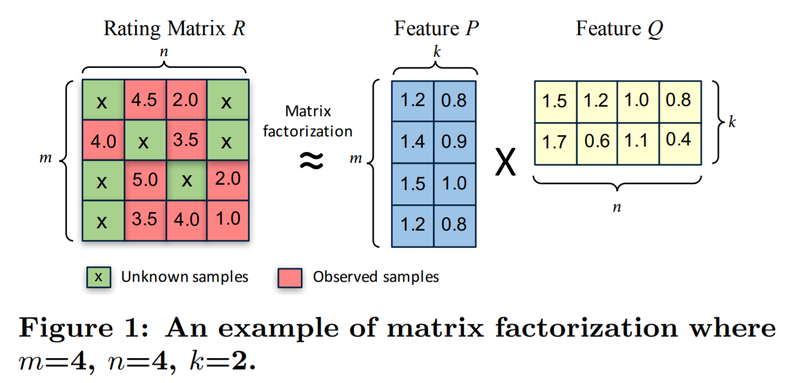

## CSR(Compressed Sparse Row) Matrix
유저 36만명, 아티스트 29만 명의 행렬을 표현하고 행렬의 각 원소에 정수 한 개(1 byte)가 들어간다면, 36만 * 29만 * 1byte = 약 97GB가 필요한데, 보통 사용하는 컴퓨터의 메모리는 16GB일테니 97GB나 되는 거대한 행렬을 메모리에 올려놓고 작업한다는 것은 불가능하다. 이런 경우 좋은 대안이 되는 것이 CSR(Compressed Sparse Row) Matrix이다. 
<br>
<br>
CSR Matrix는 Sparse한 matrix에서 **0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도** Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조이다. 

In [15]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

## MF 모델 학습하기
이전 과정에서 설명한 Matrix Factorization 모델을 implicit 패키지를 사용해 학습해보자
* implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지이다.
* 이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용한다. Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있다.

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보면, 
* factors: 유저와 아이템의 벡터를 몇 차원으로 할 것인지
* regularization: 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
* use_gpu: GPU를 사용할 것인지
* iterations: epochs와 같은 의미이다. 데이터를 몇 번 반복해서 학습할 것인지
<br>
<br>

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만, 과적합의 우려가 있어 좋은 값을 찾아야 한다.

In [17]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [18]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

학습이 끝났다면, 2가지 사항을 살펴보자.
* Zimin 벡터와 black eyed peas의 벡터를 어떻게 만들고 있는지
* 두 벡터를 곱하면 어떤 값이 나오는지

In [20]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

In [21]:
zimin_vector

array([ 2.0574448 , -0.25053218,  0.3946554 , -0.41788748,  0.23145139,
        0.580333  , -0.7161651 ,  1.2159706 , -0.24609132, -0.4948767 ,
        0.6072373 ,  0.98575026, -1.0653436 ,  0.5972518 , -0.86638045,
       -0.22729658, -1.4493889 ,  0.30418134,  1.2845552 , -0.05194067,
        0.43689257, -0.3467178 , -0.27834952, -0.31816137, -0.45085332,
        0.3394218 ,  0.5213145 , -0.6831434 , -0.04274759, -0.0231865 ,
        0.860606  , -0.3867648 ,  0.536694  ,  0.6896631 ,  0.99173003,
        0.9591435 ,  0.20843971,  0.07565114, -0.43371752, -0.74156946,
       -0.27148628, -0.8485291 , -0.40637973,  1.2264653 ,  1.44581   ,
       -0.528719  ,  0.21037625, -1.491117  , -0.38933092, -0.8860584 ,
        0.9920829 ,  0.2607942 , -0.32130134, -0.15199305, -0.64100635,
       -0.483     ,  0.47199094, -0.43797076,  0.74737763,  0.4395939 ,
       -0.43257093,  0.81906533, -0.17924577, -0.12766585, -0.06171729,
       -0.4710487 ,  0.07437566,  0.27876952, -0.8593418 , -0.75

In [22]:
black_eyed_peas_vector

array([ 2.67703533e-02,  1.75534666e-03,  7.78558152e-03, -5.58824837e-03,
        2.24119890e-02,  1.90285817e-02,  1.58530772e-02,  1.57820638e-02,
       -2.46752333e-03,  7.27512781e-03,  1.81500539e-02,  1.87469795e-02,
       -2.04970483e-02,  1.41853159e-02,  5.76602644e-04, -2.89969565e-03,
       -1.64224068e-03,  1.14988051e-02,  1.16313454e-02,  1.57970618e-02,
        1.82598196e-02,  1.35688335e-02, -1.72889349e-03,  2.61545856e-03,
        1.16897384e-02,  4.29812633e-03,  6.54057926e-03, -3.34096304e-03,
        4.21335036e-03,  1.26766609e-02,  2.77243871e-02,  4.67460137e-03,
        2.20760275e-02,  1.20838396e-02,  3.02675851e-02,  2.36682482e-02,
        9.45118070e-03,  1.61282439e-02,  1.40206823e-02, -8.46667122e-03,
       -2.35776301e-03,  1.55796176e-02,  1.68592520e-02,  3.08297146e-02,
        2.76977718e-02,  1.06707159e-02,  1.35131627e-02, -2.19063815e-02,
       -5.36450371e-03, -6.41659880e-03,  1.91740803e-02,  9.87811945e-03,
        2.08107550e-02,  

In [23]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.49386266

In [24]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.33236024

## 비슷한 아티스트 찾기 + 유저에게 추천하기
AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통해 비슷한 아티스트를 찾는다.

In [25]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000001),
 (277, 0.9833273),
 (28, 0.9814748),
 (217, 0.97194225),
 (5, 0.971288),
 (418, 0.9612009),
 (473, 0.9596831),
 (490, 0.9589831),
 (247, 0.95658696),
 (1018, 0.94553787),
 (694, 0.941152),
 (910, 0.93927306),
 (55, 0.9382386),
 (268, 0.93783677),
 (782, 0.9305792)]

In [26]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'radiohead',
 'red hot chili peppers',
 'u2',
 'placebo',
 'oasis',
 'the beatles',
 'the smashing pumpkins',
 'foo fighters',
 'nirvana',
 'arctic monkeys',
 'pink floyd',
 'the white stripes']

In [27]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

In [28]:
get_similar_artist('2pac')

['2pac',
 'dr. dre',
 'jay-z',
 'notorious b.i.g.',
 'nas',
 'the game',
 'dmx',
 '50 cent',
 'snoop dogg',
 'ice cube']

In [29]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'katy perry',
 'rihanna',
 'beyoncé',
 'the pussycat dolls',
 'leona lewis',
 'christina aguilera',
 'pink',
 'kelly clarkson']

In [30]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.44308874),
 (550, 0.43923002),
 (369, 0.4291597),
 (627, 0.41246563),
 (274, 0.40517133),
 (354, 0.40034777),
 (391, 0.39921784),
 (1800, 0.39450723),
 (2249, 0.39313632),
 (564, 0.3901015),
 (409, 0.38295805),
 (944, 0.3710886),
 (5, 0.37023395),
 (621, 0.36993897),
 (355, 0.36927882),
 (277, 0.3658775),
 (5555, 0.36586857),
 (28, 0.36513615),
 (901, 0.36119276),
 (618, 0.3589009)]

In [31]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'britney spears',
 'justin timberlake',
 'maroon 5',
 'michael jackson',
 'nelly furtado',
 'christina aguilera',
 'lady gaga',
 'katy perry',
 'kanye west',
 'amy winehouse',
 'avril lavigne',
 'red hot chili peppers',
 'alicia keys',
 'madonna',
 'muse',
 'timbaland',
 'the killers',
 'pink',
 'the pussycat dolls']

In [32]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

In [33]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.2124703202849982),
 ('black eyed peas', 0.12959388392278876),
 ('coldplay', 0.05531663070289487),
 ('jason mraz', 0.04793014511744518),
 ('maroon5', 0.000206925535479799)]

***

## 프로젝트: Movielens 영화 추천 실습
* 루브릭
    * 사용자와 아이템 개수를 바탕으로 정확한 사이즈로 만들었다.
    * 사용자와 아이템 벡터 내적 수치가 의미있게 형성되었다.
    * MF모델이 예측한 유저 선호도 및 아이템간 유사도, 기여도가 의미있게 측정되었다.
    <br>
    <br>
    
프로젝트에서 활용할 데이터셋은 추천 시스템의 MNIST라고 부를만한 Movielens 데이터이다.
* 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있다. MovieLens 1MDataset 사용을 권장한다.
* 별점 데이터는 대표적인 explicit 데이터이다. 하지만 implicit 데이터로 간주하고 테스트해 볼 수 있다.
* 별점을 **시청 횟수**로 해석해서 생각한다.
* 또한 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외한다.

### step1. 데이터 준비와 전처리
Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있다.

In [1]:
import os
import pandas as pd
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [3]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [4]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [5]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


CSR Matrix를 위해 ratings, movies 두 데이터프레임을 합쳐준다.<br>https://yganalyst.github.io/data_handling/Pd_12/
* concat
    * 데이터프레임을 물리적으로 이어 붙여주는 함수
* merge
    * 두 데이터프레임을 각 데이터에 존재하는 고유값을 기준으로 병합할 때 사용한다.
* join
    * merge를 기반으로 만들어져서 기본 작동 방식은 비슷하나, 행 인덱스를 기준으로 결합한다는 점에서 차이가 있다. 
<br>
<br>

ratings와 movies의 경우 movie_id라는 공통의 열이 있기 때문에 merge 메서드로 두 데이터프레임을 병합해준다.

In [6]:
data = pd.merge(ratings, movies)
data.head()

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
# 분석에 필요한 데이터만 남기고 삭제
using_cols = ['user_id', 'counts', 'title']
data = data[using_cols]
data.head(20)

,user_id,counts,title
0,1,5,One Flew Over the Cuckoo's Nest (1975)
1,2,5,One Flew Over the Cuckoo's Nest (1975)
2,12,4,One Flew Over the Cuckoo's Nest (1975)
3,15,4,One Flew Over the Cuckoo's Nest (1975)
4,17,5,One Flew Over the Cuckoo's Nest (1975)
5,18,4,One Flew Over the Cuckoo's Nest (1975)
6,19,5,One Flew Over the Cuckoo's Nest (1975)
7,24,5,One Flew Over the Cuckoo's Nest (1975)
8,28,3,One Flew Over the Cuckoo's Nest (1975)
9,33,5,One Flew Over the Cuckoo's Nest (1975)


In [8]:
# 검색을 쉽게하기 위해 title 열을 소문자로 바꿔준다.
data['title'] = data['title'].str.lower()
data.head(20)

,user_id,counts,title
0,1,5,one flew over the cuckoo's nest (1975)
1,2,5,one flew over the cuckoo's nest (1975)
2,12,4,one flew over the cuckoo's nest (1975)
3,15,4,one flew over the cuckoo's nest (1975)
4,17,5,one flew over the cuckoo's nest (1975)
5,18,4,one flew over the cuckoo's nest (1975)
6,19,5,one flew over the cuckoo's nest (1975)
7,24,5,one flew over the cuckoo's nest (1975)
8,28,3,one flew over the cuckoo's nest (1975)
9,33,5,one flew over the cuckoo's nest (1975)


In [9]:
# pandas.DataFrame.nunique()로 유니크한 데이터의 개수를 파악한다.
data['user_id'].nunique()

6039

In [10]:
data['title'].nunique()

3628

In [11]:
# 인기 많은 영화
movie_count = data.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

In [12]:
# 유저별 몇 개의 영화를 봤는지에 대한 통계
user_count = data.groupby('user_id')['title'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: title, dtype: float64

가수 추천 실습의 경우 유저별 play 횟수 중앙값에 대한 통계를 출력해봤지만 영화의 경우 몇 번이나 해당 영화를 봤는지에 대한 데이터가 없기 때문에 출력해보지 않았다.

In [13]:
# 검증 과정을 위한 사용자 초기 정보 추가
my_favorite = ['back to the future (1985)', 'men in black (1997)', 'toy story (1995)', 'forrest gump (1994)', 'jurassic park (1993)']

# joon이라는 user가 위 영화를 5회씩 봤다고 가정
my_movie = pd.DataFrame({'user_id': ['joon']*5, 'title': my_favorite, 'counts':[5]*5})

if not data.isin({'user_id': ['joon']})['user_id'].any():
    data = data.append(my_movie)
    
data.tail(10)

,user_id,counts,title
836473,5851,5,one little indian (1973)
836474,5854,4,slaughterhouse (1987)
836475,5854,3,"promise, the (versprechen, das) (1994)"
836476,5938,4,"five wives, three secretaries and me (1998)"
836477,5948,5,identification of a woman (identificazione di ...
0,joon,5,back to the future (1985)
1,joon,5,men in black (1997)
2,joon,5,toy story (1995)
3,joon,5,forrest gump (1994)
4,joon,5,jurassic park (1993)


indexing을 위해 pandas.DataFrame.unique()를 활용해 특정 컬럼에 포함된 유니크한 데이터만 모은다. 

In [14]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = data['user_id'].unique()
movie_unique = data['title'].unique()

# 유저, 영화 indexing 
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [15]:
# 인덱싱이 잘 됐는지 확인
print(user_to_idx['joon'])  # 6040명 중 마지막이기 때문에 6039가 나와야함.
print(movie_to_idx['jurassic park (1993)'])

6039
40


In [16]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = data['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(data):
    print('title column indexing OK!!')
    data['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')

data

user_id column indexing OK!!
title column indexing OK!!


,user_id,counts,title
0,0,5,0
1,1,5,0
2,2,4,0
3,3,4,0
4,4,5,0
...,...,...,...
0,6039,5,22
1,6039,5,175
2,6039,5,40
3,6039,5,160


In [17]:
# CSR Matrix 생성
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_title = data['title'].nunique()

csr_data = csr_matrix((data.counts, (data.user_id, data.title)), shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

In [18]:
# 모델 학습
from implicit.als import AlternatingLeastSquares
import numpy as np

# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

In [24]:
joon, jurassic_park = user_to_idx['joon'], movie_to_idx['jurassic park (1993)']
joon_vector, jurassic_park_vector = als_model.user_factors[joon], als_model.item_factors[jurassic_park]

In [25]:
joon_vector

array([-0.8311137 ,  0.01572876, -0.5735055 , -0.07427659,  0.4067528 ,
       -0.40498424, -0.05590672, -0.18444413, -1.2153893 ,  0.19563125,
        0.19854757, -0.5687014 ,  0.15382786, -0.3838791 ,  0.88210076,
       -0.5289582 , -0.11541682,  0.88674   , -0.35760823, -0.02579512,
        0.04800516,  1.3263181 , -1.043087  ,  0.2882241 , -0.685384  ,
       -0.13987829,  0.5492192 ,  0.538023  ,  0.05813529,  0.85271   ,
        0.49837542,  0.37936756,  0.2572003 , -0.25594118,  0.26551318,
       -0.9504562 , -0.1715075 , -0.49288502,  0.5612706 ,  0.86222476,
       -0.27742535, -0.27173883,  0.8821633 , -0.17796966, -0.4525798 ,
       -0.44329932,  0.4553216 ,  0.07262002, -0.6938251 ,  0.84349644,
        0.16758542, -0.5826284 , -0.7425059 ,  0.5630369 , -0.28490984,
        0.23917381,  0.56754124, -0.34404787, -0.6380337 , -0.08652262,
        0.62230116,  0.9031743 ,  1.3181564 ,  0.08646389, -0.5130018 ,
        0.09070668,  0.7779098 ,  0.43450606, -0.4276963 ,  0.16

In [26]:
jurassic_park_vector

array([-2.6263192e-02, -3.5283272e-03,  4.1333761e-04, -4.2262650e-03,
        2.8049478e-02, -1.6960986e-02,  1.5881513e-03, -1.6143648e-02,
       -4.0035758e-02,  2.1194825e-02, -5.2131293e-03, -2.9164346e-02,
        6.4439801e-03, -5.3284112e-02,  2.4437066e-02,  3.4739126e-03,
        5.2031665e-03,  4.1336901e-03, -1.3670179e-03,  1.2343025e-02,
       -1.4903203e-03,  4.3191083e-02, -1.7640505e-02,  1.9995628e-02,
       -2.1209026e-02,  4.1625327e-03,  2.3548668e-02,  1.3544166e-03,
        2.6390187e-02,  1.2098392e-02,  1.8270697e-02,  1.5781412e-02,
        3.7894777e-03,  2.4267014e-02,  3.0793525e-02, -2.3454465e-02,
        2.2075647e-03,  1.3840697e-02,  1.9772604e-02,  3.6907550e-02,
       -3.6988484e-03, -8.9097526e-03,  4.0415965e-02, -9.9738892e-03,
        1.0569963e-02,  3.3939147e-04,  4.4415295e-02,  3.1501818e-02,
        1.5401469e-02,  1.4550754e-02,  3.6931331e-03, -3.2585368e-03,
        2.1090370e-02,  1.7581580e-02,  2.2660634e-03,  1.5785985e-02,
      

In [27]:
# joon과 jurassic_park를 내적
np.dot(joon_vector, jurassic_park_vector)

0.6545883

In [28]:
men_in_black = movie_to_idx['men in black (1997)']
men_in_black_vector = als_model.item_factors[men_in_black]
np.dot(joon_vector, men_in_black_vector)

0.57480085

In [30]:
toy_story = movie_to_idx['toy story (1995)']
toy_story_vector = als_model.item_factors[toy_story]
np.dot(joon_vector, toy_story_vector)

0.5284051

토이스토리는 조금 낮은 수치를 보이지만 다른 두 영화에 대해서는 선호한다고 볼 수 있을 것 같다. 이제 AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통해 비슷한 영화를 찾는다.

In [35]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_movie = {v:k for k,v in movie_to_idx.items()}


def get_similar_movie(movie_title: str):
    movie_id = movie_to_idx[movie_title]
    similar_movie = als_model.similar_items(movie_id)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

In [36]:
get_similar_movie('men in black (1997)')

['men in black (1997)',
 'jurassic park (1993)',
 'terminator 2: judgment day (1991)',
 'total recall (1990)',
 'independence day (id4) (1996)',
 'fifth element, the (1997)',
 'matrix, the (1999)',
 'schlafes bruder (brother of sleep) (1995)',
 'lost world: jurassic park, the (1997)',
 'true lies (1994)']

In [39]:
get_similar_movie('jurassic park (1993)')

['jurassic park (1993)',
 'men in black (1997)',
 'terminator 2: judgment day (1991)',
 'total recall (1990)',
 'braveheart (1995)',
 'schlafes bruder (brother of sleep) (1995)',
 'lost world: jurassic park, the (1997)',
 'matrix, the (1999)',
 'sorority house massacre ii (1990)',
 'independence day (id4) (1996)']

비슷한 장르의 영화들이 출력된 것을 확인할 수 있다. 이제 AlternatingLeastSquares 클래스의 recommend 메서드로 내가 가장 좋아할 만한 영화들을 추천 받아보자.

In [40]:
user = user_to_idx['joon']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(50, 0.43512207),
 (92, 0.42556667),
 (87, 0.41761577),
 (110, 0.35002115),
 (124, 0.33216876),
 (99, 0.30921456),
 (150, 0.3058342),
 (26, 0.30168352),
 (670, 0.28525496),
 (60, 0.25082797),
 (4, 0.24968225),
 (48, 0.24286932),
 (64, 0.23706946),
 (38, 0.23444268),
 (154, 0.23369996),
 (33, 0.22711901),
 (475, 0.22491056),
 (141, 0.22021496),
 (82, 0.21789671),
 (62, 0.21265987)]

In [41]:
[idx_to_movie[i[0]] for i in movie_recommended]

['toy story 2 (1999)',
 'terminator 2: judgment day (1991)',
 'braveheart (1995)',
 'groundhog day (1993)',
 'matrix, the (1999)',
 'american beauty (1999)',
 'independence day (id4) (1996)',
 'e.t. the extra-terrestrial (1982)',
 'galaxy quest (1999)',
 'star wars: episode i - the phantom menace (1999)',
 "bug's life, a (1998)",
 'saving private ryan (1998)',
 'star wars: episode vi - return of the jedi (1983)',
 'sixth sense, the (1999)',
 'as good as it gets (1997)',
 'aladdin (1992)',
 'my cousin vinny (1992)',
 'fugitive, the (1993)',
 'lost world: jurassic park, the (1997)',
 'total recall (1990)']

내가 좋아할 만한 영화를 추천받았다. 다른 코드를 보던 와중 https://github.com/chaen805/AIFFEL_Exploration/blob/master/EX14/%5BE-14%5Dmovie_recommendation.ipynb 작성자분의 코드에서 추천 받은 영화의 예상 선호도 수치까지 함께 볼 수 있는 코드를 보게 돼서 참고하였다.

In [42]:
for i in movie_recommended:
    print("{} : {:04.3f}".format(idx_to_movie[i[0]], i[1]))

toy story 2 (1999) : 0.435
terminator 2: judgment day (1991) : 0.426
braveheart (1995) : 0.418
groundhog day (1993) : 0.350
matrix, the (1999) : 0.332
american beauty (1999) : 0.309
independence day (id4) (1996) : 0.306
e.t. the extra-terrestrial (1982) : 0.302
galaxy quest (1999) : 0.285
star wars: episode i - the phantom menace (1999) : 0.251
bug's life, a (1998) : 0.250
saving private ryan (1998) : 0.243
star wars: episode vi - return of the jedi (1983) : 0.237
sixth sense, the (1999) : 0.234
as good as it gets (1997) : 0.234
aladdin (1992) : 0.227
my cousin vinny (1992) : 0.225
fugitive, the (1993) : 0.220
lost world: jurassic park, the (1997) : 0.218
total recall (1990) : 0.213


그리고 explain 메서드를 사용해 이 추천에 기여한 정도를 확인

In [45]:
toy_story = movie_to_idx['toy story (1995)']
explain = als_model.explain(user, csr_data, itemid=toy_story)

In [46]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('toy story (1995)', 0.40844689830366104),
 ('forrest gump (1994)', 0.07579953665573542),
 ('back to the future (1985)', 0.043968011504416586),
 ('men in black (1997)', 0.011992346391009833),
 ('jurassic park (1993)', -0.020930136830434917)]

***

## 회고

* 전체적으로 수치가 낮다. 이 정도로 내가 선호하는 영화를 잘 추천했다고 말할 수는 없을 것 같다. 다만 넷플릭스, 유튜브와 같이 추천시스템을 대표적으로 활용하고 있는 곳에서도 비슷한 양상의 수치가 나오는지, 다른 모델을 사용하고 있다면 그 모델은 수치가 얼마나 나오는지 모르기 때문에 무작정 좋지 않은 결과라고 말할 수는 없지 않을까...생각해본다...

* 그럼에도 흥미로웠던 노드였다고 느꼈다. 추천 시스템이라는 분야에 대해 솔직히 가볍게 생각했는데, 내가 좋아하는 음악이나 가수, 영화를 추천받으면서 몰랐던 정보를 알게 되어 한 번 들어볼까? 또는 한번 봐볼까? 생각이 들었는데 그만큼 추천 시스템이 기업에 얼마나 중요하게 적용될 수 있는 분야인지 알게 되었다.